<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

In [ ]:
# зафиксируем random state для воспроизводимости результатов
RANDOM_STATE = 42

Будем предсказывать зарплату по описанию вакансии - это задача регрессии!

In [ ]:
df = pd.read_csv('salary_data.csv', index_col = [0])

In [ ]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEducation Required: Bachelor’s degree required, prefe...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe Healthcare Data Scientist position will join our ...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information security company. We are the world's largest provider...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\nDirectorate: Earth & Biological Sciences\n\nDivisi...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory",0,0,56,97,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),"Data Scientist\nAffinity Solutions / Marketing Cloud seeks smart, curious, technically savvy can...",2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


Посмотрим на распределение целевой переменной. Построим гистограмму распределения вероятностей признака `avg_salary`

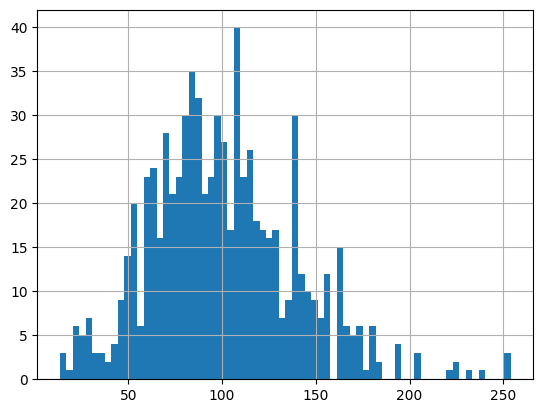

In [ ]:
plt.hist(df['avg_salary'], bins=70)
plt.grid()
plt.show()

Распределение похоже на нормальное. Лучший вариант для линейной регрессии.

Найдем средние/медианные езарплаты в зависимости от профессии. Используем метод `groupby()`

In [ ]:
df.groupby('Job Title')['avg_salary'].median()

,avg_salary
Job Title,
Ag Data Scientist,80.5
Analytics - Business Assurance Data Analyst,43.0
Analytics Consultant,66.5
Analytics Manager,87.5
Analytics Manager - Data Mart,64.0
...,...
System and Data Analyst,59.0
Systems Engineer II - Data Analyst,62.5
"Technology-Minded, Data Professional Opportunities",70.5


In [ ]:
df['Job Title'].nunique()

264

Разобъем данные на тренировочные и тестовые. Для обучения будем использовать в качестве признаков только описание вакансии `Job Description`

In [ ]:
X = df['Job Description']
y = df['avg_salary']

In [ ]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

CPU times: user 3.88 ms, sys: 0 ns, total: 3.88 ms
Wall time: 4.75 ms


Закодируйте столбец `Job Description` при помощи **tf-idf**:

* обучите (метод `fit`) на тренировочных данных `X_train`, а затем примените (`transform`) и к трейну, и к тесту в отдельности.

*  попробуйте подобрать гиперпараметры `min_df`, `max_df`, `ngram_range` у метода для достижения наилучшего качества модели

In [ ]:

# Подбор гиперпараметров TF-IDF
tfidf = TfidfVectorizer(min_df=10, max_df=0.8, ngram_range=(1, 2))

# Обучаем на тренировочных данных и трансформируем
X_train_tfidf = tfidf.fit_transform(X_train)

# Применяем трансформирование к тестовым данным
X_test_tfidf = tfidf.transform(X_test)

# Проверка формы преобразованных данных
print(X_train_tfidf.shape, X_test_tfidf.shape)

(593, 7210) (149, 7210)


**Вопрос:** если использовать `min_df = 5`, `max_df=1.0`, `ngram_range=(1,1)`, то сколько столбцов получится в матрице после применения кодировки?

In [ ]:
# Применим указанные параметры TF-IDF к тренировочным данным и посмотрим, сколько признаков будет в результате
tfidf_custom = TfidfVectorizer(min_df=5, max_df=1.0, ngram_range=(1, 1))

# Обучаем на тренировочных данных и трансформируем
X_train_tfidf_custom = tfidf_custom.fit_transform(X_train)

# Выведем количество признаков после TF-IDF кодирования
X_train_tfidf_custom.shape[1]


4175

Обучите линейную регрессию `Ridge()` на тренировочных данных и сделайте предсказания на тренировочных и тестовых данных.

**model = Ridge(alpha=1.1)**

In [ ]:
# ваш код здесь
from sklearn.linear_model import Ridge

# Применим указанные параметры TF-IDF к тренировочным данным
tfidf_custom = TfidfVectorizer(min_df=5, max_df=1.0, ngram_range=(1, 1))

# Обучаем на тренировочных данных и трансформируем
X_train_tfidf_custom = tfidf_custom.fit_transform(X_train)

# Применяем трансформирование к тестовым данным
X_test_tfidf_custom = tfidf_custom.transform(X_test)

# Инициализация модели Ridge
model = Ridge(alpha=1.1)

# Обучаем модель на закодированных данных
model.fit(X_train_tfidf_custom, y_train)

# Делаем предсказания на тренировочных данных
y_train_pred = model.predict(X_train_tfidf_custom)

# Делаем предсказания на тестовых данных
y_test_pred = model.predict(X_test_tfidf_custom)

# Оценим качество модели на тренировочных и тестовых данных
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

r2_train, r2_test



(0.7748676243434285, 0.6194680529163464)

Посчитаем метрику качества предсказания $R^2$. Чем ближе она к 1, тем лучше качество модели.

Посчитайте значение $R^2$ на тренировочных и на тестовых данных.

**Вопрос:** чему равен $R^2$ на тесте?

In [ ]:
# ваш код здесь
# Применяем указанные параметры TF-IDF
tfidf = TfidfVectorizer(min_df=5, max_df=1.0, ngram_range=(1, 3)) # второй параметр отвечает за количество грамм сколько слов мы выбираем

# Преобразуем описание вакансий
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Инициализация модели Ridge
model = Ridge(alpha=1.1)

# Обучение модели
model.fit(X_train_tfidf, y_train)

# Предсказания на обучающей выборке
y_train_pred = model.predict(X_train_tfidf)

# Предсказания на тестовой выборке
y_test_pred = model.predict(X_test_tfidf)

# Оценка качества модели на обучающей и тестовой выборках
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R2 на тренировочных данных: {r2_train}")
print(f"R2 на тестовых данных: {r2_test}")


R2 на тренировочных данных: 0.7748676243434285
R2 на тестовых данных: 0.6194680529163464


Потестируйте построенную модель. Посмотрите, как она прогнозирует зарплаты для разных вакансий

In [ ]:
model.predict(tfidf.transform([u"director"]))

array([94.57997553])

In [ ]:
model.predict(tfidf.transform([u"manager"]))

array([84.6360381])

**Вопрос:** посчитайте зарплату "data scientist" при помощи модели.

In [ ]:
# ваш код здесь
model.predict(tfidf.transform([u"data scientist"]))

array([115.87933175])

Посмотрим на веса модели

**Вопрос:** какой признак имеет наибольший положительный вес?


In [ ]:
%%time
# Получаем имена признаков
features = np.array(tfidf.get_feature_names_out())

# Извлекаем коэффициенты модели для признаков, у которых вес не равен нулю
coefs = sorted(zip(features[model.coef_ != 0], model.coef_[model.coef_ != 0]), key=lambda x: -x[1])

# Преобразуем в DataFrame для удобства
coefs_df = pd.DataFrame(coefs, columns=["ngram", "weight"])

# Посмотрим на первые несколько строк
coefs_df.head()


CPU times: user 7.28 ms, sys: 13 µs, total: 7.29 ms
Wall time: 7.2 ms


,ngram,weight
0,actuarial,37.252350
1,platform,36.996826
2,credit,35.336105
3,climate,34.481568
4,scientists,33.424038


In [ ]:
%%time
coefs = sorted(zip(list(np.array(tfidf.get_feature_names_out())[model.coef_ != 0]), model.coef_[model.coef_ != 0]),
               key=lambda x: -x[1])
coefs = pd.DataFrame(coefs, columns=["ngram", "weight"])

coefs_df.head()

CPU times: user 10.9 ms, sys: 70 µs, total: 10.9 ms
Wall time: 13.3 ms


,ngram,weight
0,actuarial,37.252350
1,platform,36.996826
2,credit,35.336105
3,climate,34.481568
4,scientists,33.424038


Закодируйте столбец `Job Description` при помощи мешка слов.

Постройте модель линейной регрессии `Ridge()` на тренировочных данных и сделайте предсказания на тренировочных и тестовых данных, если столбец
**model = Ridge(alpha=1.1)**

Рассчитайте метрику качества предсказания $R^2$ на тренировочных и на тестовых данных.

Потестируйте построенную модель. Посмотрите, как она прогнозирует зарплаты для разных вакансий. Сделайте прогноз зарплаты для "data scientist" при помощи построенной модели.


**Вопрос:** Как изменилось качество модели? чему равен $R^2$ на тесте? какой признак имеет наибольший положительный вес?

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Загрузка данных (если еще не загружены)
# df = pd.read_csv('salary_data.csv', index_col=0)

# Разделение данных
X = df['Job Description']
y = df['avg_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Кодирование с помощью Bag of Words
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Обучение модели Ridge
model = Ridge(alpha=1.1)
model.fit(X_train_bow, y_train)

# Предсказания
y_train_pred = model.predict(X_train_bow)
y_test_pred = model.predict(X_test_bow)

# Оценка качества
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R2 на тренировочных данных: {r2_train}")
print(f"R2 на тестовых данных: {r2_test}")

# Предсказание для вакансии "data scientist"
data_scientist_description = ["We are looking for a data scientist with experience in machine learning and data analysis."]
data_scientist_bow = vectorizer.transform(data_scientist_description)
predicted_salary = model.predict(data_scientist_bow)

print(f"Предсказанная зарплата для 'data scientist': {predicted_salary[0]}")

# Посмотрим на веса модели
coefs = sorted(zip(vectorizer.get_feature_names_out(), model.coef_), key=lambda x: -x[1])
coefs_df = pd.DataFrame(coefs, columns=["ngram", "weight"])

# Наибольший положительный вес
max_weight_feature = coefs_df.iloc[0]
print(f"Признак с наибольшим положительным весом: {max_weight_feature['ngram']} с весом {max_weight_feature['weight']}")


R2 на тренировочных данных: 0.99891425921253
R2 на тестовых данных: 0.6844198430554591
Предсказанная зарплата для 'data scientist': 92.7429408630597
Признак с наибольшим положительным весом: senior с весом 14.51052204765902


In [ ]:

# Оценка качества
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R2 на тренировочных данных: {r2_train}")
print(f"R2 на тестовых данных: {r2_test}")

# Наибольший положительный вес
max_weight_feature = coefs_df.iloc[0]
print(f"Признак с наибольшим положительным весом: {max_weight_feature['ngram']} с весом {max_weight_feature['weight']}")


R2 на тренировочных данных: 0.99891425921253
R2 на тестовых данных: 0.6844198430554591
Признак с наибольшим положительным весом: senior с весом 14.51052204765902


Коэффициент детерминации для модели на тренировочных данных увеличился с 0,775 до 0,999, для тестовых данных - с 0,619 до 0,684. Эти положительные изменения указывают на то, что прогноз с помощью мешка слов более предпочтительнее.